## Neural Network
- 가중치 매개변수의 적절한 값을 데이터로 자동으로 학습하는 능력O
### 활성화 함수
- 입력 신호의 총합이 활성화를 일으키는지 정함
- 층 쌓는 효과를 위해선 활성화 함수는 무조건 비선형 함수여야 함(선형함수는 제곱해도 의미 없음)

In [8]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [ ]:
def ReLU(x):
    if x < 0:
        return 0
    else:
        return x 
#######################################
def relu(x):
    return np.maximum(0, x)

### 다차원 배열의 계산

In [2]:
import numpy as np
A = np.array([1,2,3,4])
print(A)
np.ndim(A)  # 차원수
A.shape     # 1차원도 다차원과 통일된 형태로 반환하기 위해 튜플로 반환

[1 2 3 4]


(4,)

In [4]:
B = np.array([[1,2],[3,4],[5,6]])
print(B)
np.ndim(B)
B.shape     # 3x2 행렬

[[1 2]
 [3 4]
 [5 6]]


(3, 2)

### 행렬곱
- np.dot()
    - np.dot(A, B)와 np.dot(B, A)는 다를 수 있음
- 행렬끼리 차원수가 맞아야 함
    - 3x2 • 2x4 = 3x4
    - 3x2 • 2 = 3

In [ ]:
# 신경망에서의 행렬 곱
# X • W = Y
# 2 • 2x3 = 3
X = np.array([1, 2])
W = np.array([[1, 3, 5], [2, 4, 6]])
Y = np.dot(X, W)

print(Y)

[ 5 11 17]


In [9]:
# 3층 신경망 구현
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network

def identity_function(x): return x 

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)

    return y 

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


- 회귀: 항등 함수(identity function)
- 분류: 소프트맥스 함수(softmax functin)
    - 출력: 0~1 사이의 실수
    - 출력 총합: 1
    - 확률로 해석됨 

In [10]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)   # 오버플로를 막기 위함
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y 

In [18]:
# 404 에러 떠서 url로 MNIST 받지 않고 keras에서 가져오겠듬

### MNIST 데이터셋 활용해서 손글씨 숫자 인식
# import sys, os
# sys.path.append(os.path.join(os.getcwd(), "data"))
# from data.mnist import load_mnist

# (x_train, t_train), (x_test, t_test) = \
#     load_mnist(flatten = True, normalize = False)

# print(x_train.shape)
# print(t_train.shape)
# print(x_test.shape)
# print(t_test.shape)

In [20]:
%pip install tensorflow

   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   - -------------------------------------- 16.0/332.0 MB 88.9 MB/s eta 0:00:04
   --- ------------------------------------ 29.6/332.0 MB 73.2 MB/s eta 0:00:05
   ------ --------------------------------- 53.7/332.0 MB 88.3 MB/s eta 0:00:04
   --------- ------------------------------ 74.7/332.0 MB 91.4 MB/s eta 0:00:03
   ------------ --------------------------- 99.9/332.0 MB 97.0 MB/s eta 0:00:03
   -------------- ----------------------- 123.7/332.0 MB 100.4 MB/s eta 0:00:03
   ---------------- ---------------------- 142.3/332.0 MB 98.8 MB/s eta 0:00:02
   ------------------- ------------------- 164.4/332.0 MB 99.7 MB/s eta 0:00:02
   ------------------- ------------------- 168.0/332.0 MB 93.5 MB/s eta 0:00:02
   -------------------- ------------------ 171.7/332.0 MB 82.4 MB/s eta 0:00:02
   --------------------- ----------------- 186.9/332.0 MB 81.2 MB/s eta 0:00:02
   ----------------------- --------------- 197.1/

In [1]:
from tensorflow.keras.datasets import mnist

(x_train, t_train), (x_test, t_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], -1)
x_test  = x_test.reshape(x_test.shape[0], -1)

print(x_train.shape, t_train.shape)
print(x_test.shape, t_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


In [3]:
%pip install matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 8.1/8.1 MB 53.8 MB/s  0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 85.4 MB/s  0:00:00

   ---------------------------------------- 0/6 [pyparsing]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [font

훈련 데이터: (60000, 28, 28) (60000,)
테스트 데이터: (10000, 28, 28) (10000,)


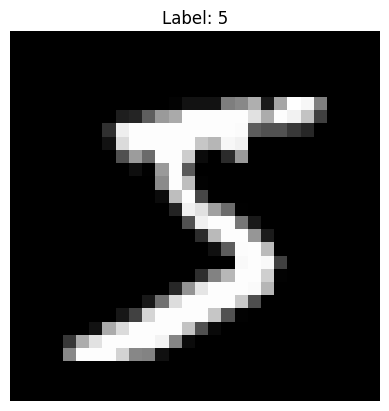

In [2]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# MNIST 데이터 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("훈련 데이터:", x_train.shape, y_train.shape)
print("테스트 데이터:", x_test.shape, y_test.shape)

# 첫번째 이미지 보기
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.axis("off")
plt.show()

### 신경망의 추론 처리
- 입력층 뉴런 784개, 출력층 뉴런 10개로 구성
    - 이미지 크기가 28*28 = 784
    - 0~9의 숫자를 구분하는 거라 10개
- 은닉층은 두개
    1. 50개 뉴런
    2. 100개 뉴런
    - 50개와 100개는 임의로 정한 값 

In [3]:
%pip install pickle

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


- sample_weight.pkl에 저장된 학습된 가중치 매개변수를 읽어옴
- 이 파일에는 가중치와 편향 매개변수가 딕셔너리 변수로 저장돼있음

In [4]:
import os
import pickle
def get_data():
    (x_train, t_train), (x_test, t_test) = mnist.load_data()
    
    # flatten
    x_train = x_train.reshape(x_train.shape[0], -1)
    x_test  = x_test.reshape(x_test.shape[0], -1)
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", "rb") as f:
        network = pickle.load(f)

    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y 